**📲 Imports.**

This cell contains a list of Python libraries and modules that are being imported for use in the notebook. These imports include both standard Python libraries (such as 📁 io, 📁 os, 📁 csv, and ➗ math) and popular third-party libraries (such as 📷 cv2, 🧮 numpy, 🐼 pandas, 🔥 torch, 🤖 sklearn, 🤖 models, 🤖 transforms, 🧑‍🔬 optim, and 🧠 nn).

Some of the libraries are used for data manipulation and visualization (such as 🧮 numpy, and 🐼 pandas), while others are used for machine learning and deep learning tasks (such as 🔥 torch, 🤖 sklearn, 🤖 models, 🤖 transforms, 🧑‍🔬 optim, and 🧠 nn). The 📷 cv2 library is specifically used for computer vision tasks

In [2]:
#Define libraries
import copy
import time 
import numpy as np
import pandas as pd
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.utils.data
import torch.nn.functional as F
from torch.optim import lr_scheduler
from glob import glob
import json
import os
import sys
from tqdm.notebook import tqdm
import argparse
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import math, random
import pathlib
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import shutil
import logging
import argparse
import numpy as np
import torchvision
import numpy as np
import pandas as pd 
import seaborn as sb
import torch.nn as nn
from PIL import Image
from tqdm import tqdm
import torch.optim as optim
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from statistics import mean, stdev
from torchvision.utils import make_grid
import torch.utils.model_zoo as model_zoo
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold
import easyocr
import matplotlib.patches as patches
from pprint import pprint
from pathlib import Path
from PIL import Image


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**✔ Checking Pytorch and Torchvision Versions.**

This cell 🔍 prints out the current versions of the 🔥 PyTorch and 🔍 Torchvision libraries that are installed in the notebook's environment. 🔥 PyTorch is a popular machine learning library, while 🔍 Torchvision is a package that provides image and video datasets and models for 🔥 PyTorch.

Checking the versions of these libraries is important for ensuring that the notebook is using the correct and up-to-date versions of the libraries, which can affect the performance and compatibility of the code. The print function is used to display the 🔥 PyTorch and 🔍 Torchvision versions, and the 🔥 torch and 🔍 torchvision modules are imported at the beginning of the notebook to access their version numbers. 🔬

In [3]:
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  2.0.0
Torchvision Version:  0.15.1


**setting the random seed**

Setting the random seed ensures that these sources of randomness are consistent across different runs of the experiment, allowing for reproducibility of results, and that the results of any random operations are consistent across different machine

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed = 1999
seed_everything(seed)

**⌨ Defining some parameters for the model.**

This cell sets several important parameters that will be used to configure and train a machine learning model. The (num_classes, batch_size, and fold_train) variables specify the number of classes in the dataset, the batch size for training, and the number of epochs to train for, respectively. These are common parameters in machine learning tasks and can affect the performance and training time of the mode. fold_train parameter refers to the usage of the first fold of the data for traing and The remaining folds will be used for validation, This helps to prevent the model from overfitting to the training data.

In [19]:
class CFG:
    isOneHot = False
    label_map = {'dot': 0, 'horizontal_bar' : 1, 'vertical_bar': 2, 'line': 3, 'scatter': 4}
    num_classes = 5
    batchSize = 32
    fold_train = 0 #  the first fold of the data will be used for training

**Data Loading**


only images that are at least 9 pixels wide and 9 pixels high will be loaded from the dataset. The first 10000 images that meet this criteria will be loaded.

In [20]:
INPUT_DIR = '/kaggle/input/benetech-making-graphs-accessible'
train_image_paths = sorted(glob(os.path.join(INPUT_DIR, 'train/images/*.jpg')))
train_annotation_paths = sorted(glob(os.path.join(INPUT_DIR, 'train/annotations/*.json')))
print('train images:', len(train_image_paths))
print('train annotations:', len(train_annotation_paths))
args = argparse.Namespace(
    sampling_size = 10000,
    thresholds = [9, 128]
)

train images: 60578
train annotations: 60578


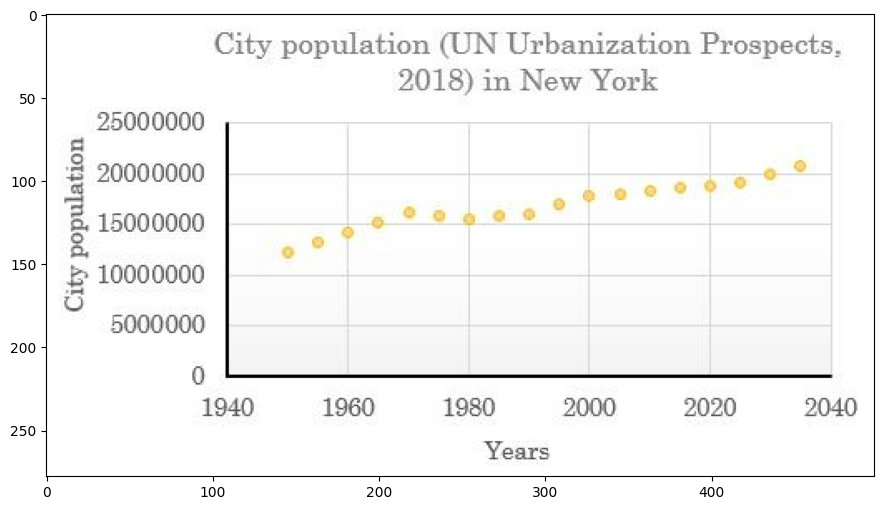

In [21]:
#load a random image from the training directory
plt.figure(figsize=(14, 6))
file_name = random.choice(train_image_paths)
image = plt.imread(file_name)
plt.imshow(image)
plt.show()

In [22]:
#load the annotations for the above graph
a = file_name.split("/")[-1]

split_file_path = file_name.split("/")
split_file_name = a.split(".")
json_file_path = INPUT_DIR+"/train/annotations/"+split_file_name[0]+".json"
annot = open(json_file_path)
annot = json.load(annot)
annot


{'source': 'generated',
 'chart-type': 'scatter',
 'plot-bb': {'height': 152, 'width': 364, 'x0': 109, 'y0': 65},
 'text': [{'id': 0,
   'polygon': {'x0': 100,
    'x1': 479,
    'x2': 479,
    'x3': 100,
    'y0': 9,
    'y1': 9,
    'y2': 50,
    'y3': 50},
   'text': 'city papulation (un urbanizatiom prospects 2018) in new york',
   'role': 'chart_title'},
  {'id': 1,
   'polygon': {'x0': 261,
    'x1': 304,
    'x2': 304,
    'x3': 261,
    'y0': 255,
    'y1': 255,
    'y2': 269,
    'y3': 269},
   'text': 'years',
   'role': 'axis_title'},
  {'id': 2,
   'polygon': {'x0': 9,
    'x1': 26,
    'x2': 26,
    'x3': 9,
    'y0': 72,
    'y1': 72,
    'y2': 180,
    'y3': 180},
   'text': 'city population',
   'role': 'axis_title'},
  {'id': 3,
   'polygon': {'x0': 92,
    'x1': 126,
    'x2': 126,
    'x3': 92,
    'y0': 229,
    'y1': 229,
    'y2': 243,
    'y3': 243},
   'text': '1940',
   'role': 'tick_label'},
  {'id': 4,
   'polygon': {'x0': 166,
    'x1': 200,
    'x2': 200,
 

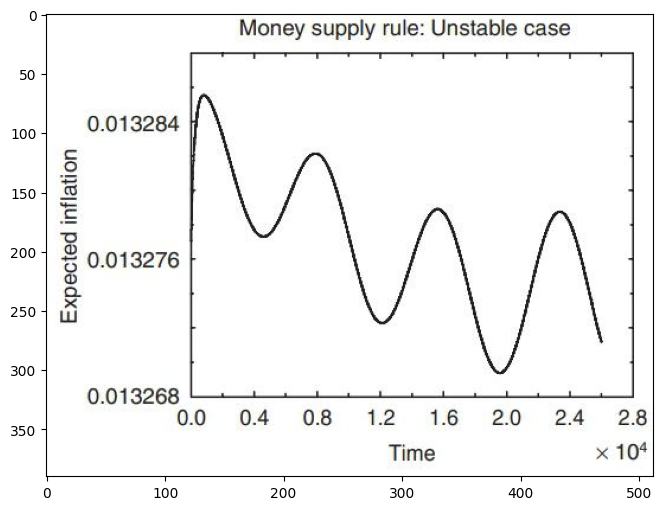

In [23]:
# loading a random image from the test directory
plt.figure(figsize=(14, 6))
file_name = random.choice(os.listdir(INPUT_DIR+"/test/images/"))
image = plt.imread(INPUT_DIR+"/test/images/"+file_name)
plt.imshow(image)
plt.show()

**creating a dataframe with images and annotations for classification**

it sets the hight and length of the plot bounding box

In [24]:
#creating a dataframe with images and annotations for classification
train_df = pd.DataFrame({'image_path':train_image_paths})

train_df['train_annotations'] = train_df['image_path'].str.replace('images', 'annotations')
train_df['train_annotations'] = train_df['train_annotations'].str.replace('jpg', 'json')

chart_type, source, height, width = [], [], [], []
for annotations in tqdm(train_df['train_annotations']):
    annot = open(annotations)
    annot = json.load(annot)
    chart_type.append(annot['chart-type'])
    source.append(annot['source'])
    height.append(annot['plot-bb']['height'])
    width.append(annot['plot-bb']['width'])

train_df['chart_type'] = chart_type
train_df['source'] = source
train_df['height'] = height
train_df['width'] = width

100%|██████████| 60578/60578 [00:40<00:00, 1481.80it/s]


In [25]:
train_df.head(10)

,image_path,train_annotations,chart_type,source,height,width
0,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,vertical_bar,generated,137,379
1,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,line,generated,359,497
2,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,line,generated,116,376
3,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,scatter,generated,230,415
4,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,line,generated,421,507
5,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,scatter,generated,219,436
6,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,dot,generated,224,437
7,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,dot,generated,208,417
8,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,line,generated,213,430
9,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,line,extracted,276,403


In [26]:
train_df.chart_type.value_counts()

line              24942
vertical_bar      19189
scatter           11243
dot                5131
horizontal_bar       73
Name: chart_type, dtype: int64

In [27]:
files_and_labels = {}
for dirname, _, filenames in os.walk('/kaggle/input/benetech-making-graphs-accessible/test/images'):   #iterates over the list of files
    for filename in filenames: 
        files_and_labels[os.path.join(dirname, filename)] = 'line'      #The index parameter is set to 0 to create a DataFrame with a single row
test_df = pd.DataFrame(files_and_labels, index = [0]).T.reset_index().rename(columns = {'index':'filename', 0 :'chart_type'})
test_df 

,filename,chart_type
0,/kaggle/input/benetech-making-graphs-accessibl...,line
1,/kaggle/input/benetech-making-graphs-accessibl...,line
2,/kaggle/input/benetech-making-graphs-accessibl...,line
3,/kaggle/input/benetech-making-graphs-accessibl...,line
4,/kaggle/input/benetech-making-graphs-accessibl...,line


🔧 Transformation Configurations.

This cell discusses how to configure PyTorch transforms for image preprocessing 🖼️, which is an important step in developing deep learning models for image classification tasks 🤖. The code shows how to define different sets of transforms for training and testing data 🔧, including normalization 📊. The use of these transforms can improve the model's performance by increasing the variability and diversity of the training data 💪. These transforms are used to convert images from their original format to a format that can be used by a machine learning model. transform normalizes the pixel values of an image to have a mean of 0.5 and a standard deviation of 0.5.

In [28]:
#data transformation
transforms_train = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transforms_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

 The image is then converted from the BGR color space to the RGB color space. The image is then resized to 500x300 pixels. The image is then converted to a NumPy array and normalized to have a range of [0, 1]. The label is then extracted from the Pandas DataFrame

In [29]:
class ImageCharts(torch.utils.data.Dataset):
    def __init__(self, df, transforms  = None): ### phase = train/test
        self.df = df
        self.transforms = transforms

    def __len__(self): #return the num of images in the class
        return len(self.df)

    def __getitem__(self,idx):
        name_img = self.df.iloc[idx]['image_path']
        img = cv.imread(name_img)
        img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        img = cv.resize(img,(500,300))
        img = img.astype(np.float32)/255.0

        label = np.array(self.df.iloc[idx]['label'])

        if(self.transforms is not None):
            img = self.transforms(img)
        return img, label

**Cross Validation**

It is a technique used to evaluate the performance of a model. it splits the data into folds. The lambda function converts the chart type to the corresponding label. The StratifiedKFold object ensures that each fold has the same distribution of labels as the training data as a whole. This helps to ensure that the model is not overfit to any particular subset of the data.

In [30]:
def cv_split(Xtrain, ytrain, n_folds, seed):
    kfold = StratifiedKFold(n_splits = n_folds, shuffle = True, random_state = seed)
    for num, (train_index, val_index) in enumerate(kfold.split(Xtrain, ytrain)):
        Xtrain.loc[val_index, 'fold'] = int(num)
    Xtrain['fold'] = Xtrain['fold'].astype(int)
    return Xtrain

meta_df = cv_split(train_df,train_df['chart_type'], 5, 42)
meta_df['label'] = meta_df['chart_type'].apply(lambda x: CFG.label_map[x])
meta_df.head(10)

,image_path,train_annotations,chart_type,source,height,width,fold,label
0,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,vertical_bar,generated,137,379,4,2
1,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,line,generated,359,497,0,3
2,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,line,generated,116,376,1,3
3,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,scatter,generated,230,415,4,4
4,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,line,generated,421,507,2,3
5,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,scatter,generated,219,436,1,4
6,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,dot,generated,224,437,1,0
7,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,dot,generated,208,417,4,0
8,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,line,generated,213,430,3,3
9,/kaggle/input/benetech-making-graphs-accessibl...,/kaggle/input/benetech-making-graphs-accessibl...,line,extracted,276,403,0,3


DataLoaders

creates a mini-batch iterator for the dataset which is more efficient than training and evaluating the model on the entire dataset at once.

In [31]:
#dataloaders
train_ds = ImageCharts(meta_df[meta_df.fold != CFG.fold_train].reset_index(), transforms=transforms_train)
val_ds = ImageCharts(meta_df[meta_df.fold == CFG.fold_train].reset_index(), transforms=transforms_train)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size= CFG.batchSize, shuffle=True) #specify the size of each mini batch
val_dl = torch.utils.data.DataLoader(val_ds, batch_size= CFG.batchSize, shuffle=True)

this cell dicusses to get the first batch of data from the training dataset

torch.Size([32, 3, 300, 500])
torch.Size([32])
chart_type: vertical_bar


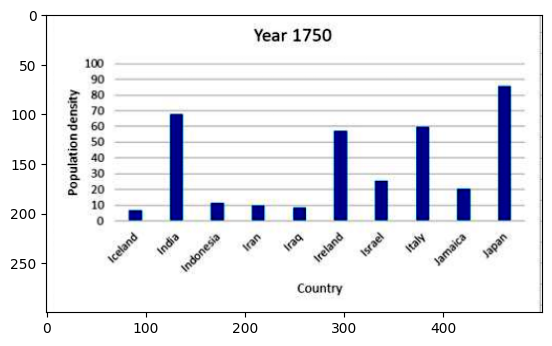

In [32]:
a,b = next(iter(train_dl)) #a: images in the batch b:labels
print(a.shape)
print(b.shape)
print('chart_type:',list(CFG.label_map)[b[0].detach().numpy()])
plt.imshow(a[0].permute(1,2,0))

**Defing the model we will use which is "ResNet50" and load it into gpu**

In [33]:
model = torchvision.models.resnet50(pretrained=False)


num_features = model.fc.in_features
model.fc = nn.Linear(num_features, CFG.num_classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = model.to(device)
next(myModel.parameters()).device

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


device(type='cuda', index=0)

In [56]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**📝 Training Loop (The definition of the function).**


The following code defines a Python function called "training" that implements the training loop for a given model architecture, dataset, loss function, optimizer, and learning rate scheduler.

The function takes five input arguments:

"model" refers to the model architecture that needs to be trained. "dataloaders" refers to a dictionary containing the training and validation data loaders. "criterion" refers to the loss function that needs to be optimized. "optimizer" refers to the optimization algorithm that updates the model parameters. "scheduler" refers to the learning rate scheduler that dynamically adjusts the learning rate during training.The scheduler is used to adjust the learning rate of the optimizer over time.. The "num_epochs" parameter specifies the number of times the model will iterate over the entire dataset during training.

During each epoch, the training loop iterates over the training and validation data loaders, computing the loss and accuracy on each batch of data. The model parameters are updated based on the gradients of the loss function with respect to the model parameters. The learning rate scheduler adjusts the learning rate at each epoch based on a predefined schedule.

The function also saves the model with the best validation accuracy and the final model parameters in two different files for later use.

The training loop's progress is printed out for each epoch, including the loss, accuracy, and learning rate for both the training and validation phases.

The function returns the trained model, along with four lists that contain the training and validation accuracy and loss history.


In [35]:
def training(model, train_dl, val_dl, num_epochs):
    
  # Loss Function, Optimizer and Scheduler
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')

  # Repeat for each epoch
    best_acc = -1
    for epoch in range(num_epochs):
        
        running_loss = 0.0
        correct_prediction = 0
        total_prediction = 0
        

    # Repeat for each batch in the training set
        for i, data in enumerate(train_dl):
            
            
        # Get the input features and target labels, and put them on the GPU
            inputs, labels = data[0].to(device), data[1].to(device)
        # Normalize the inputs
            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
            optimizer.zero_grad()

        # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()

        # Keep stats for Loss and Accuracy
            running_loss += loss.item()

        # Get the predicted class with the highest score
            _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]
            if (i + 1) % 50 == 0:
                # print every 10 mini-batches
                print('Epoch [{}/{}], Step [{}/{}], Loss : {:.4f}'
               .format(epoch + 1, num_epochs, i + 1, len(train_dl), running_loss/(i + 1)))
    
    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {acc:.4f}')

    gt = []
    pred = []

    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0 
        for idx, data_ in enumerate(val_dl):
            inputs, labels = data_[0].to(device), data_[1].to(device)

            # Normalize the inputs
            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m) / inputs_s

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Keep stats for Loss and Accuracy
            val_loss += loss.item()

            # Get the predicted class with the highest score
            _, prediction = torch.max(outputs,1)
            predi = torch.softmax(outputs, dim = -1)
            gt.append(labels)
            pred.append(predi[:,1])
            # Count of predictions that matched the target label
            correct += (prediction == labels).sum().item()
            total += prediction.shape[0]
        print('Accuracy of the network val: {:.4f} %'.format(100 * correct / total))

        final_score = 100 * correct / total


        if (best_acc < final_score):
            best_acc = final_score
            print("Saving best model!")
            torch.save(model.state_dict(), f'Benetech _ResNet50_fold0.pth')
    print('Finished Training')
num_epochs = 1  
training(myModel, train_dl, val_dl, num_epochs)



Epoch [1/1], Step [50/1515], Loss : 0.1168
Epoch [1/1], Step [100/1515], Loss : 0.1200
Epoch [1/1], Step [150/1515], Loss : 0.1362
Epoch [1/1], Step [200/1515], Loss : 0.1514
Epoch [1/1], Step [250/1515], Loss : 0.1588
Epoch [1/1], Step [300/1515], Loss : 0.1618
Epoch [1/1], Step [350/1515], Loss : 0.1579
Epoch [1/1], Step [400/1515], Loss : 0.1543
Epoch [1/1], Step [450/1515], Loss : 0.1522
Epoch [1/1], Step [500/1515], Loss : 0.1486
Epoch [1/1], Step [550/1515], Loss : 0.1430
Epoch [1/1], Step [600/1515], Loss : 0.1415
Epoch [1/1], Step [650/1515], Loss : 0.1374
Epoch [1/1], Step [700/1515], Loss : 0.1321
Epoch [1/1], Step [750/1515], Loss : 0.1259
Epoch [1/1], Step [800/1515], Loss : 0.1211
Epoch [1/1], Step [850/1515], Loss : 0.1156
Epoch [1/1], Step [900/1515], Loss : 0.1113
Epoch [1/1], Step [950/1515], Loss : 0.1070
Epoch [1/1], Step [1000/1515], Loss : 0.1028
Epoch [1/1], Step [1050/1515], Loss : 0.0995
Epoch [1/1], Step [1100/1515], Loss : 0.0959
Epoch [1/1], Step [1150/1515],

**Object Character Recognition**

In [37]:
reader = easyocr.Reader(['en']) # initialize OCR
result = reader.readtext(image) # input image

for i in range(3):
    print(result[i], "\n")

([[159, 0], [446, 0], [446, 26], [159, 26]], 'Money supply rule: Unstable case', 0.8987966969136233) 

([[30, 80], [116, 80], [116, 104], [30, 104]], '0.013284', 0.7427970224852146) 

([[9, 111], [29, 111], [29, 181], [9, 181]], '1', 0.5740677807600356) 



In [45]:
annotations = Path("/kaggle/input/benetech-making-graphs-accessible/train/annotations")
images = Path("/kaggle/input/benetech-making-graphs-accessible/train/images")
all_annotations = list(annotations.iterdir())

Plot graphs with annotations

In [46]:
def plot_with_annotations(filename, ax):
    with open(filename, "r") as f:
        row = pd.json_normalize(json.load(f)).iloc[0] #first row of the df
        
    img = Image.open(images / filename.with_suffix(".jpg").name)
    
    ax.imshow(img)
    bbox = patches.Rectangle(
        (row["plot-bb.x0"], row["plot-bb.y0"]), 
        row["plot-bb.width"], 
        row["plot-bb.height"], 
        linewidth=1, 
        edgecolor="r", 
        facecolor="none"
    )
    ax.add_patch(bbox)
    
    role2color = {
        'axis_title': "blue",
        'chart_title':"green",
        'legend_label':"yellow",
        'other':"grey",
        'tick_grouping':"brown",
        'tick_label':"purple",
    }
    for text in row["text"]:
        polygon = text["polygon"]
        xs = np.array([v for k, v in polygon.items() if "x" in k])
        ys = np.array([v for k, v in polygon.items() if "y" in k])
        xy = np.vstack([xs, ys]).T
        text_polygon = patches.Polygon(xy, linewidth=1, edgecolor=role2color[text["role"]], facecolor="none")
        ax.add_patch(text_polygon)

    
    ax.axis("off")

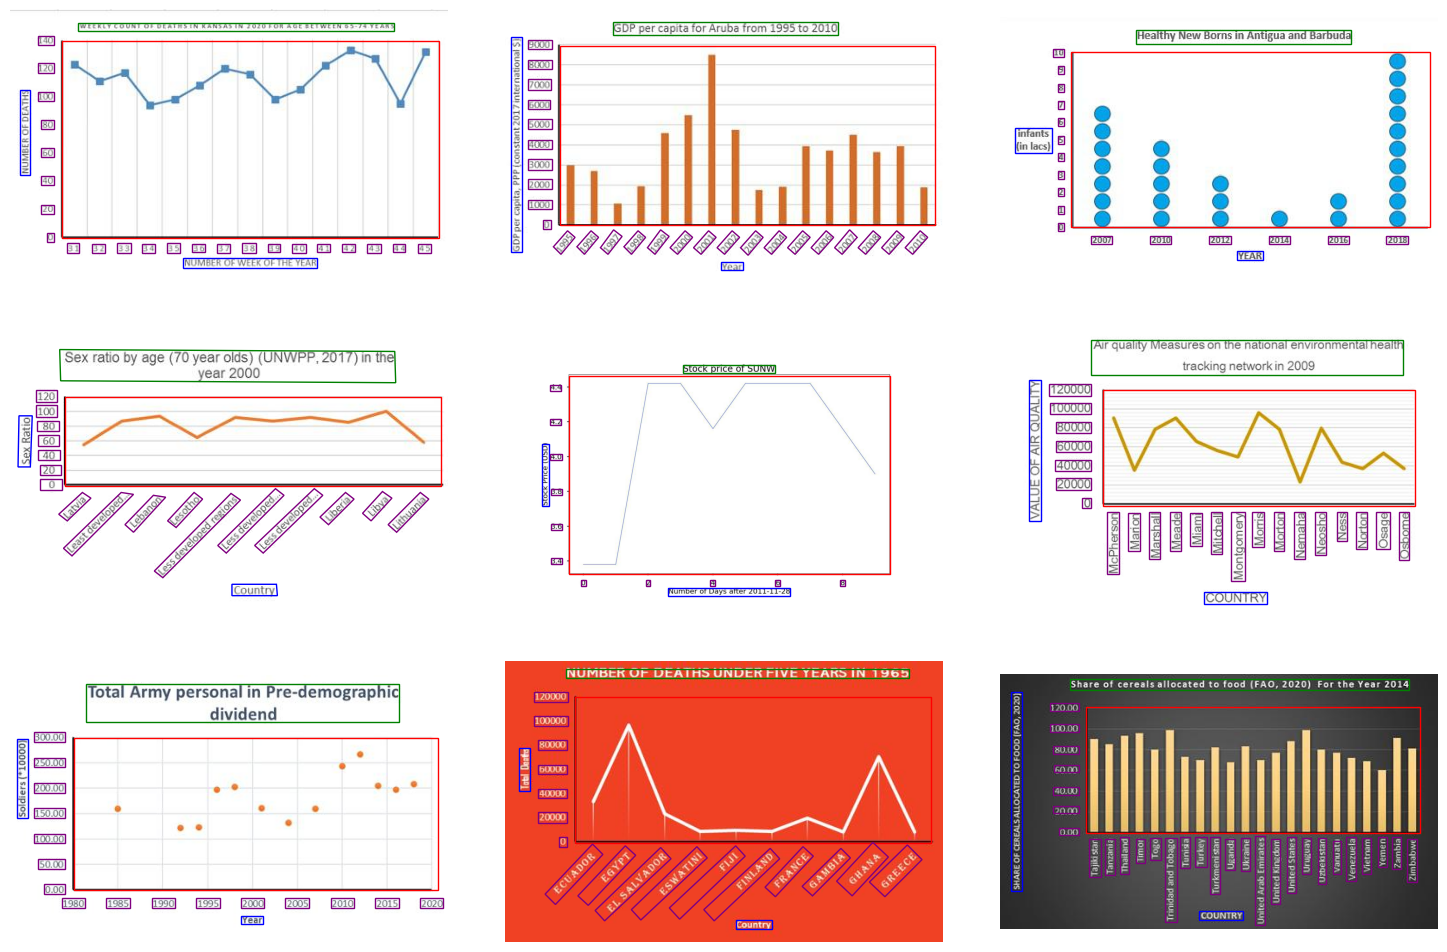

In [47]:
nrows, ncols = 3, 3
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 10))
fig.tight_layout()
ax = ax.flatten()

idxs = np.random.randint(low=0, high=len(all_annotations), size=nrows*ncols)

for i, idx in enumerate(idxs):
    plot_with_annotations(all_annotations[idx], ax[i])
    
plt.savefig("annotated_examples.pdf", bbox_inches="tight")

In [51]:
ANNOTATION_PATH = "/kaggle/input/benetech-making-graphs-accessible/train/annotations/0000ae6cbdb1.json"

**Predict Bounding Boxes**

In [55]:
with open(ANNOTATION_PATH) as f:
    annotation = json.loads(f.read())

masks = []
for i in range(2):
    x0 = annotation["text"][i]["polygon"]["x0"]
    y0 = annotation["text"][i]["polygon"]["y0"]
    H = annotation["text"][i]["polygon"]["x1"] - x0
    W = annotation["text"][i]["polygon"]["y2"] - y0
    mask = image[y0:y0+W, x0:x0+H]
    masks.append(mask)

reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory

results = []
for mask in masks:
    result = reader.readtext(mask)
    results.append(result)

print(results)

[[([[107, 0], [347, 0], [347, 17], [107, 17]], 'Money supply rule: unstable', 0.49523194016435695)], []]
